In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set max columns to None (display all)
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('final_dataset.csv')

In [19]:
df.drop(columns='eid', axis=1, inplace=True)

In [20]:
df.head()

,Gender,Smoking,BMI,Age,SBP,DBP,HDL cholesterol,Triglycerides,Walking activity,CRP,LDL cholesterol,statin use,Albumin,ALP,ALT,AST,GGT,Total_bilirubin,Diabetes,Glycated_haemoglobin,Glucose,Urate,Platelet_count
0,1,2.0,24.9680,62.0,157.0,86.0,0.981,3.141,3.0,3.97,3.020,0,43.43,82.2,21.21,20.2,60.9,6.54,0.0,36.108174,4.540,266.6,309.3
1,1,0.0,27.8769,61.0,156.0,87.0,1.484,1.703,5.0,3.60,4.686,0,41.41,51.5,14.31,21.2,29.4,10.54,0.0,34.800000,4.860,319.6,253.6
2,1,0.0,28.5211,47.0,143.5,87.0,1.108,0.725,5.0,0.79,2.889,0,41.67,114.2,22.60,21.9,13.1,7.28,0.0,32.100000,5.093,318.3,275.0
3,0,0.0,24.7781,69.0,160.5,90.5,1.836,2.149,7.0,0.43,3.218,0,45.55,59.7,18.08,23.2,15.5,10.40,0.0,33.200000,5.206,215.3,170.5
4,1,0.0,27.9601,56.0,142.5,86.0,1.221,1.385,3.0,1.01,4.000,0,44.29,95.9,56.04,36.5,67.2,7.37,0.0,38.200000,6.456,354.6,232.6


In [21]:
df.columns

Index(['Gender', 'Smoking', 'BMI', 'Age', 'SBP', 'DBP', 'HDL cholesterol',
       'Triglycerides', 'Walking activity', 'CRP', 'LDL cholesterol',
       'statin use', 'Albumin', 'ALP', 'ALT', 'AST', 'GGT', 'Total_bilirubin',
       'Diabetes', 'Glycated_haemoglobin', 'Glucose', 'Urate',
       'Platelet_count'],
      dtype='object')

## 0 Set-up & data housekeeping

In [22]:
df = df.rename(columns=lambda c: c.strip().lower().replace(' ', '_'))

# handy column aliases
cat_cols = ['gender', 'smoking', 'statin_use', 'walking_activity']
num_cols = [c for c in df.columns if c not in cat_cols]

# quick type cast
df[cat_cols] = df[cat_cols].astype('category')
df['female'] = (df['gender'] == 0).astype(int)
df['statin_use'] = df['statin_use'].cat.codes        # 1 = user, 0 = non-user

In [23]:
df.describe()

,bmi,age,sbp,dbp,hdl_cholesterol,triglycerides,crp,ldl_cholesterol,statin_use,albumin,alp,alt,ast,ggt,total_bilirubin,diabetes,glycated_haemoglobin,glucose,urate,platelet_count,female
count,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000,427899.000000
mean,27.434277,56.550964,137.882302,82.263648,1.448206,1.745373,2.608625,3.559330,0.151461,45.212322,83.590525,23.530259,26.224691,37.486655,9.122403,0.052363,36.108174,5.122255,309.329625,252.995733,0.538475
std,4.774299,8.091451,18.102916,9.853166,0.382063,1.018782,4.360925,0.869721,0.358498,2.617290,26.186781,14.113442,10.607083,41.896967,4.373195,0.222270,6.540726,1.232134,80.121023,59.051207,0.498518
min,12.121200,37.000000,65.000000,32.000000,0.219000,0.231000,0.080000,0.276000,0.000000,17.380000,8.000000,3.010000,4.100000,5.000000,1.080000,0.000000,15.000000,0.995000,89.100000,0.300000,0.000000
25%,24.163800,50.000000,125.500000,75.500000,1.171000,1.046000,0.660000,2.946000,0.000000,43.500000,67.300000,15.420000,21.000000,18.600000,6.440000,0.000000,33.000000,4.602000,251.000000,214.500000,0.000000
50%,26.775500,58.000000,137.500000,82.263648,1.398000,1.484000,1.340000,3.519000,0.000000,45.210000,80.400000,20.170000,24.400000,26.500000,8.090000,0.000000,35.500000,4.932000,303.700000,250.000000,1.000000
75%,29.891300,63.000000,148.500000,88.500000,1.674000,2.148000,2.780000,4.120000,0.000000,46.910000,95.700000,27.340000,28.800000,41.000000,10.390000,0.000000,37.700000,5.311000,360.600000,285.600000,1.000000
max,74.683700,73.000000,268.000000,147.500000,4.401000,11.278000,79.960000,9.797000,1.000000,59.800000,1416.700000,491.030000,947.200000,1184.900000,87.420000,1.000000,515.200000,36.813000,1067.500000,1821.000000,1.000000


## 1 Explore distributions & transform skewed markers

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


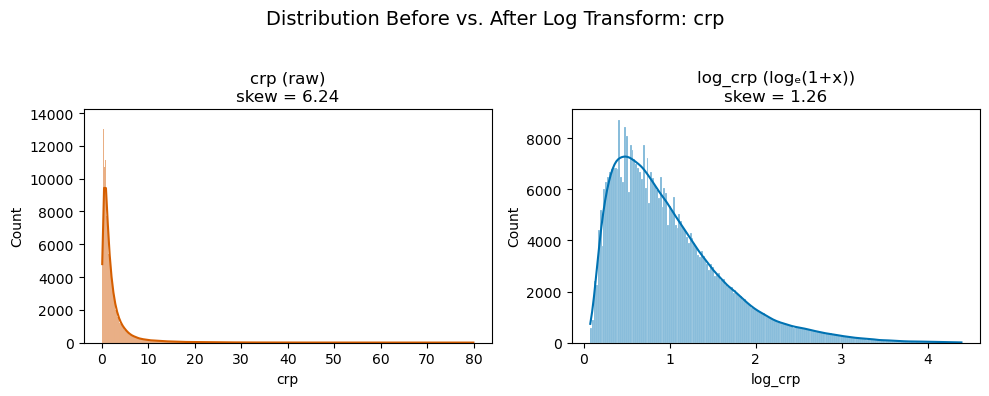

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


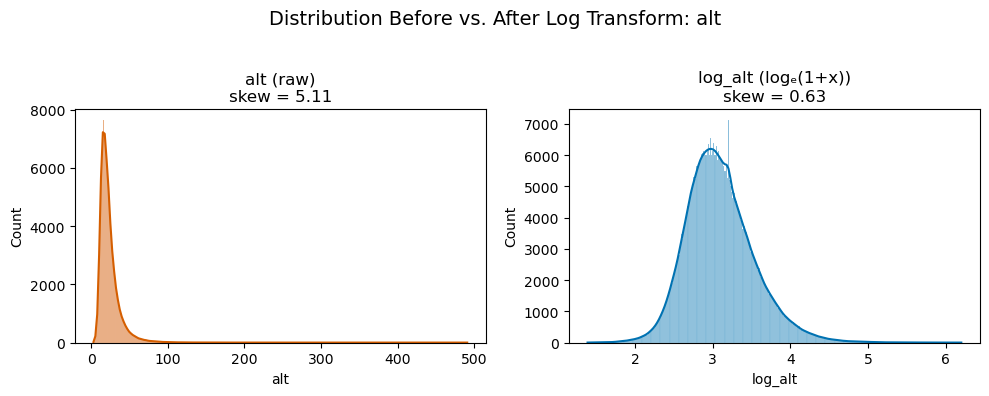

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


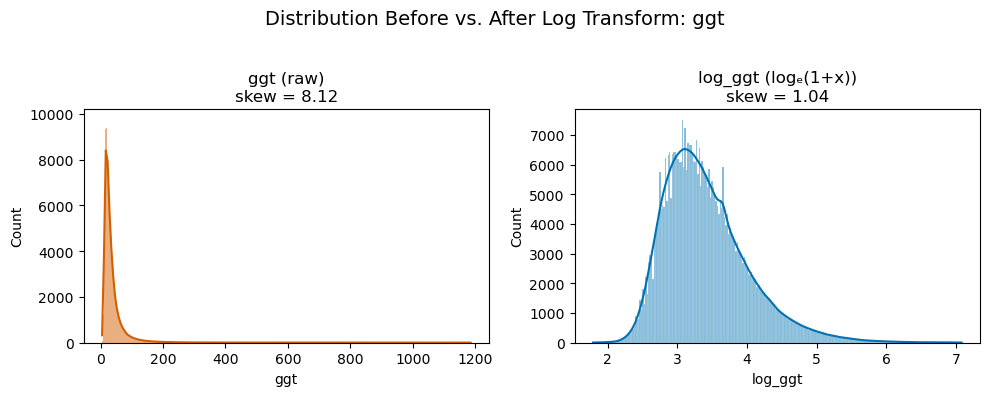

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


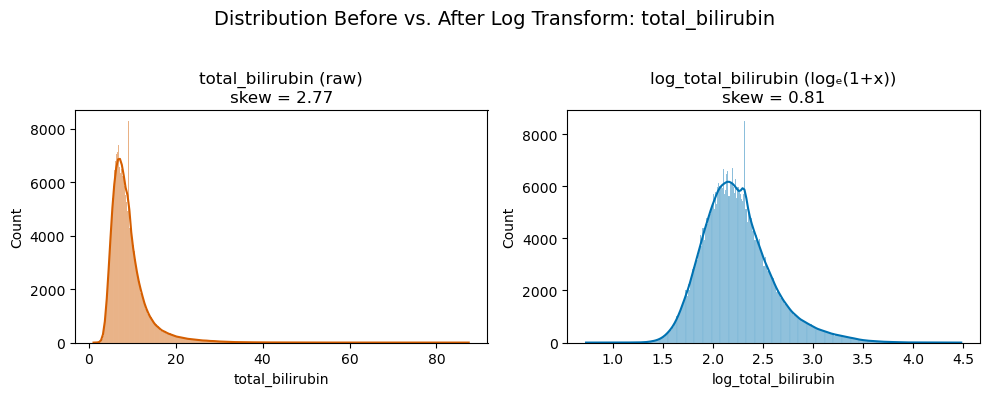

In [24]:
skewed = ['crp', 'alt', 'ggt', 'total_bilirubin']

# Add log(1+x) columns if not already present
for col in skewed:
    new_col = f'log_{col}'
    if new_col not in df.columns:
        df[new_col] = np.log1p(df[col])

# Helper: produce side‑by‑side histograms with skew annotation
def plot_before_after(col):
    log_col = f'log_{col}'
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='#D55E00', edgecolor='white')
    axes[0].set_title(f'{col} (raw)\nskew = {df[col].skew():.2f}')
    axes[0].set_xlabel(col)
    
    sns.histplot(df[log_col], kde=True, ax=axes[1], color='#0072B2', edgecolor='white')
    axes[1].set_title(f'{log_col} (logₑ(1+x))\nskew = {df[log_col].skew():.2f}')
    axes[1].set_xlabel(log_col)
    
    plt.suptitle(f'Distribution Before vs. After Log Transform: {col}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(f'{col}_log_transform_comparison.png', dpi=300)
    plt.show()

# Generate plots for all skewed variables
for col in skewed:
    plot_before_after(col)

## Run linear regression models

In [27]:
# outcomes (use LOG columns for the skewed ones)
outcomes = {
    'ldl_cholesterol'  : 'LDL-C',
    'hdl_cholesterol'  : 'HDL-C',
    'triglycerides': 'Triglycerides',
    'log_crp'          : 'CRP (log)'
}

base_covars = ['age', 'bmi', 'sbp', 'dbp',
               'smoking', 'walking_activity',
               'glycated_haemoglobin', 'diabetes',
               'albumin', 'alp', 'log_alt', 'ast',
               'log_ggt', 'log_total_bilirubin',
               'platelet_count', 'glucose', 'urate',
               'statin_use'] 

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler      

# ── 1.  Z-scale numeric variables once ──────────────────────────────────────
categoricals = ['smoking', 'statin_use', 'female', 'walking_activity']
numeric_cols = [c for c in df.columns if c not in categoricals]

df_scaled = df.copy()
df_scaled[numeric_cols] = StandardScaler().fit_transform(df_scaled[numeric_cols])

# ── 2.  Helper to build RHS with mutual‐adjustment of other outcomes ────────
def rhs_for(target):
    others = [o for o in outcomes if o != target]
    return ' + '.join(base_covars + others)

# ── 3.  Fit sex-specific models (men / women) ───────────────────────────────
summary_rows = []

for sex_code, sex_label in [(1, 'Men'), (0, 'Women')]:
    sub = df_scaled[df_scaled['female'] == sex_code]
    print(f'\n=== {sex_label}  (N = {len(sub):,}) ===')

    for y, label in outcomes.items():
        formula = f"{y} ~ {rhs_for(y)}"
        model   = smf.ols(formula, data=sub).fit(cov_type='HC3')

        beta   = model.params['statin_use']
        se     = model.bse   ['statin_use']
        p      = model.pvalues['statin_use']
        ci_lo, ci_hi = beta - 1.96*se, beta + 1.96*se

        summary_rows.append([label, sex_label, beta, ci_lo, ci_hi, p])

        # print the coefficient table
        print(f'\nOutcome: {label}')
        print(model.summary())

# ── 4.  Compact summary table ───────────────────────────────────────────────
summary = pd.DataFrame(summary_rows,
                       columns=['Outcome', 'Sex',
                                'β (statin)', 'CI low', 'CI high', 'p'])
print('\nStatin effect within each sex (per-SD coefficients):')
print(summary.to_string(index=False,
      formatters={'β (statin)': '{:.3f}'.format,
                  'CI low'    : '{:.3f}'.format,
                  'CI high'   : '{:.3f}'.format,
                  'p'         : '{:.4f}'.format}))



=== Men  (N = 230,413) ===

Outcome: LDL-C
                            OLS Regression Results                            
Dep. Variable:        ldl_cholesterol   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     3215.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:31:15   Log-Likelihood:            -2.8495e+05
No. Observations:              230413   AIC:                         5.700e+05
Df Residuals:                  230384   BIC:                         5.703e+05
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------


Outcome: Triglycerides
                            OLS Regression Results                            
Dep. Variable:          triglycerides   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     3550.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:31:17   Log-Likelihood:            -2.3140e+05
No. Observations:              230413   AIC:                         4.629e+05
Df Residuals:                  230384   BIC:                         4.632e+05
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
In


Outcome: LDL-C
                            OLS Regression Results                            
Dep. Variable:        ldl_cholesterol   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     3917.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:31:19   Log-Likelihood:            -2.3863e+05
No. Observations:              197486   AIC:                         4.773e+05
Df Residuals:                  197457   BIC:                         4.776e+05
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept 


Outcome: Triglycerides
                            OLS Regression Results                            
Dep. Variable:          triglycerides   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     2739.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:31:21   Log-Likelihood:            -2.6330e+05
No. Observations:              197486   AIC:                         5.267e+05
Df Residuals:                  197457   BIC:                         5.270e+05
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
In

In [29]:
summary

,Outcome,Sex,β (statin),CI low,CI high,p
0,LDL-C,Men,-1.135852,-1.147595,-1.124108,0.000000e+00
1,HDL-C,Men,-0.122615,-0.135402,-0.109829,8.234949e-79
2,Triglycerides,Men,0.181608,0.169932,0.193285,4.112457e-204
3,CRP (log),Men,-0.198989,-0.212291,-0.185687,5.688493e-189
4,LDL-C,Women,-1.003813,-1.013254,-0.994372,0.000000e+00
5,HDL-C,Women,-0.042035,-0.051243,-0.032828,3.620863e-19
6,Triglycerides,Women,0.074589,0.061664,0.087514,1.159010e-29
7,CRP (log),Women,-0.129095,-0.140819,-0.117370,2.712601e-103


In [30]:
summary.to_csv('results.csv', index=False)

## Plot results

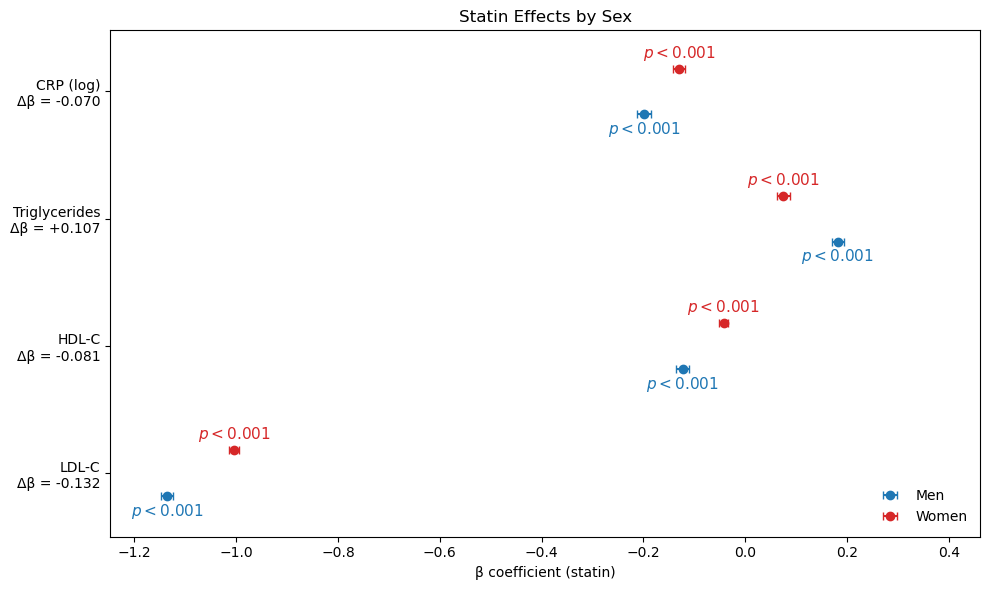

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sum_df = summary.copy()

def fmt_p(p):
    return r'$p < 0.001$' if p < 0.001 else rf'$p = {p:.3f}$'

# ---------- 3.  Prepare ----------
order = ['LDL-C', 'HDL-C', 'Triglycerides', 'CRP (log)']
sum_df['Outcome'] = pd.Categorical(sum_df['Outcome'], categories=order, ordered=True)
sum_df.sort_values(['Outcome', 'Sex'], inplace=True)

# β difference
diff = (
    sum_df.pivot(index='Outcome', columns='Sex', values='β (statin)')
      .assign(Diff=lambda x: x['Men'] - x['Women'])
      .reset_index()
)

# Build y‑tick labels with Δβ on second line
label_dict = {row['Outcome']: f"{row['Outcome']}\nΔβ = {row['Diff']:+.3f}"
              for _, row in diff.iterrows()}

# ---------- 4.  Plot ----------
fig, ax = plt.subplots(figsize=(10, 6))
offset = 0.18   # vertical offset between men & women
y_positions = np.arange(len(order))

# Reference line

xmin = sum_df['CI low'].min()
xmax = sum_df['CI high'].max()

for sex, y_off, color in zip(['Men', 'Women'], [-offset, offset], ['tab:blue', 'tab:red']):
    sub = sum_df[sum_df['Sex'] == sex]
    y = y_positions + y_off
    xerr = [sub['β (statin)'] - sub['CI low'], sub['CI high'] - sub['β (statin)']]
    ax.errorbar(sub['β (statin)'], y, xerr=xerr, fmt='o', color=color, capsize=3, label=sex, zorder=3)
    
    # p‑value annotation (above for women, below for men)
    v_offset = 0.12 if sex == 'Women' else -0.12
    for xi, yi, pi in zip(sub['β (statin)'], y, sub['p']):
        ax.text(xi, yi + v_offset, fmt_p(pi),
                ha='center', va='center', fontsize=11, color=color, zorder=4)

# ---------- 5.  Formatting ----------
ax.set_yticks(y_positions)
ax.set_yticklabels([label_dict[o] for o in order])
ax.set_xlabel('β coefficient (statin)')
ax.set_title('Statin Effects by Sex')
ax.legend(frameon=False, loc='lower right')

# widen x‑axis for readability
# xrange = xmax - xmin
# ax.set_xlim(xmin - 0.12 * xrange, xmax + 0.05 * xrange)
margin = 0.2 * (xmax - xmin)
ax.set_xlim(xmin - 0.1, xmax + margin)
top_pad    = 0.3        # half a unit of extra space
lower_lim  = -0.5
upper_lim  = y_positions[-1] + offset + top_pad
ax.set_ylim(lower_lim, upper_lim)
plt.tight_layout()
plt.savefig('model_results.png', dpi=300, transparent=True, facecolor='none')
plt.show()

## Age x Sex stratified LDL regression model

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# ── 0. Define outcome and covariates ───────────────────────────────────────
outcome = 'ldl_cholesterol'
outcome_label = 'LDL-C'

base_covars = ['age', 'bmi', 'sbp', 'dbp',
               'smoking', 'walking_activity',
               'glycated_haemoglobin', 'diabetes',
               'albumin', 'alp', 'log_alt', 'ast',
               'log_ggt', 'log_total_bilirubin',
               'platelet_count', 'glucose', 'urate',
               'statin_use']

categoricals = ['smoking', 'statin_use', 'female', 'walking_activity']
numeric_cols = [c for c in df.columns if c not in categoricals]

# ── 1. Z-scale numeric variables ───────────────────────────────────────────
df_scaled = df.copy()
df_scaled[numeric_cols] = StandardScaler().fit_transform(df_scaled[numeric_cols])

# ── 2. Define age bands: ≤55 and ≥60 only ──────────────────────────────────
def assign_age_band(age):
    if age <= 50:
        return '≤50'
    elif age >= 60:
        return '≥60'
    else:
        return np.nan  # exclude 51–59

df_scaled['age_band'] = df['age'].apply(assign_age_band)
df_scaled = df_scaled.dropna(subset=['age_band'])  # drop 51–59

# ── 3. Fit stratified models ───────────────────────────────────────────────
summary_rows = []

for sex_code, sex_label in [(1, 'Men'), (0, 'Women')]:
    for band in ['≤50', '≥60']:
        sub = df_scaled[(df_scaled['female'] == sex_code) & (df_scaled['age_band'] == band)]
        n = len(sub)
        n_statin = sub['statin_use'].sum()

        if n < 100:
            print(f"\n⚠️  Skipping {sex_label}, age {band} (only {n} participants)")
            continue

        print(f"\n=== {sex_label}, age {band} (N = {n:,}, statin users = {int(n_statin):,}) ===")

        formula = f"{outcome} ~ {' + '.join(base_covars)}"
        model = smf.ols(formula, data=sub).fit(cov_type='HC3')

        beta = model.params.get('statin_use', np.nan)
        se   = model.bse.get('statin_use', np.nan)
        p    = model.pvalues.get('statin_use', np.nan)
        ci_lo, ci_hi = beta - 1.96 * se, beta + 1.96 * se

        summary_rows.append([sex_label, band, beta, ci_lo, ci_hi, p])

        print(f"\nOutcome: {outcome_label}")
        print(model.summary())

# ── 4. Summary table ───────────────────────────────────────────────────────
summary = pd.DataFrame(summary_rows,
    columns=['Sex', 'Age Band', 'β (statin)', 'CI low', 'CI high', 'p'])

print('\nStatin effect on LDL-C (per-SD coefficients):')
print(summary.to_string(index=False,
    formatters={'β (statin)': '{:.3f}'.format,
                'CI low'    : '{:.3f}'.format,
                'CI high'   : '{:.3f}'.format,
                'p'         : '{:.4f}'.format}))



=== Men, age ≤50 (N = 60,868, statin users = 1,466) ===

Outcome: LDL-C
                            OLS Regression Results                            
Dep. Variable:        ldl_cholesterol   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     387.9
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:32:10   Log-Likelihood:                -73505.
No. Observations:               60868   AIC:                         1.471e+05
Df Residuals:                   60842   BIC:                         1.473e+05
Df Model:                          25                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------


=== Women, age ≤50 (N = 51,266, statin users = 3,066) ===

Outcome: LDL-C
                            OLS Regression Results                            
Dep. Variable:        ldl_cholesterol   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     408.6
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:32:12   Log-Likelihood:                -64859.
No. Observations:               51266   AIC:                         1.298e+05
Df Residuals:                   51240   BIC:                         1.300e+05
Df Model:                          25                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [34]:
summary

,Sex,Age Band,β (statin),CI low,CI high,p
0,Men,≤50,-0.694827,-0.751234,-0.638421,8.672558e-129
1,Men,≥60,-1.216904,-1.230888,-1.202920,0.000000e+00
2,Women,≤50,-0.898644,-0.934978,-0.862310,0.000000e+00
3,Women,≥60,-1.076418,-1.088256,-1.064581,0.000000e+00
